# LAB Assignment
---
Implement the model:-
1.   Association Rule Mining (Apriori Algorithm)
2.   Decision Tree
3.   Naive Bayes algorithm for text data
4.   Naive Bayes algorithm
5.   KNN algorithm
6.   Clustering algorithm
---
#####These all algorithms have to be implememted as per discussion in class 
#####Note:- 
#####1. No use of any library for model building
#####2.Data will be taken as covererd in class
---

**Implemment association rule mining using Apriori algorithm using algorithm discussed in class(In Python)**

Input: Data taken in class

Output : Association Rules 

In [1]:
import pandas as pd
import numpy as np
import itertools

In [2]:
data = pd.read_csv('/content/drive/MyDrive/DataSet/AprioriData.csv')
data.shape

(5, 4)

In [3]:
data

,Item1,Item2,Item3,Item4
0,1,3,4.0,NaN
1,2,3,5.0,NaN
2,1,2,3.0,5.0
3,2,5,NaN,NaN
4,1,3,5.0,NaN


In [4]:
minimum_support_count = 2
records = []
for i in range(0, 5):
    records.append([str(data.values[i,j]) for j in range(0,4)])

items = sorted([item for sublist in records for item in sublist if item != 'nan'])
print(items)

['1.0', '1.0', '1.0', '2.0', '2.0', '2.0', '3.0', '3.0', '3.0', '3.0', '4.0', '5.0', '5.0', '5.0', '5.0']


In [5]:
#Here in 1st iterarion, candidate item set CI1 is generated. Item set FI1 is generated by comparing CI1 support_count with minimum support count.
def stage_1(items, minimum_support_count):
    c1 = {i:items.count(i) for i in items}
    l1 = {}
    for key, value in c1.items():
        if value >= minimum_support_count:
           l1[key] = value 
    
    return c1, l1


In [6]:
#After 1st iteraation,in 2st iterarion, candidate item set C2 is generated. Item set l2 is generated by comparing C1 support_count with minimum support count.
def stage_2(l1, records, minimum_support_count):
    l1 = sorted(list(l1.keys()))
    L1 = list(itertools.combinations(l1, 2))
    c2 = {}
    l2 = {}
    for iter1 in L1:
        count = 0
        for iter2 in records:
            if sublist(iter1, iter2):
                count+=1
        c2[iter1] = count
    for key, value in c2.items():
        if value >= minimum_support_count:
            if check_subset_frequency(key, l1, 1):
                l2[key] = value 
    
    return c2, l2

In [7]:
def stage_3(l2, records, minimum_support_count):
    l2 = list(l2.keys())
    L2 = sorted(list(set([item for t in l2 for item in t])))
    L2 = list(itertools.combinations(L2, 3))
    c3 = {}
    l3 = {}
    for iter1 in L2:
        count = 0
        for iter2 in records:
            if sublist(iter1, iter2):
                count+=1
        c3[iter1] = count
    for key, value in c3.items():
        if value >= minimum_support_count:
            if check_subset_frequency(key, l2, 2):
                l3[key] = value 
        
    return c3, l3

In [8]:
def stage_4(l3, records, minimum_support_count):
    l3 = list(l3.keys())
    L3 = sorted(list(set([item for t in l3 for item in t])))
    L3 = list(itertools.combinations(L3, 4))
    c4 = {}
    l4 = {}
    for iter1 in L3:
        count = 0
        for iter2 in records:
            if sublist(iter1, iter2):
                count+=1
        c4[iter1] = count
    for key, value in c4.items():
        if value >= minimum_support_count:
            if check_subset_frequency(key, l3, 3):
                l4[key] = value 
        
    return c4, l4

In [9]:
def sublist(lst1, lst2):
    return set(lst1) <= set(lst2)

In [10]:
def check_subset_frequency(itemset, l, n):
    if n>1:    
        subsets = list(itertools.combinations(itemset, n))
    else:
        subsets = itemset
    for iter1 in subsets:
        if not iter1 in l:
            return False
    return True

In [11]:
c1, l1 = stage_1(items, minimum_support_count)
c2, l2 = stage_2(l1, records, minimum_support_count)
c3, l3 = stage_3(l2, records, minimum_support_count)
c4, l4 = stage_4(l3, records, minimum_support_count)
print("L1 => ", l1)
print("L2 => ", l2)
print("L3 => ", l3)
print("L4 => ", l4)

L1 =>  {'1.0': 3, '2.0': 3, '3.0': 4, '5.0': 4}
L2 =>  {('1.0', '3.0'): 3, ('1.0', '5.0'): 2, ('2.0', '3.0'): 2, ('2.0', '5.0'): 3, ('3.0', '5.0'): 3}
L3 =>  {('1.0', '3.0', '5.0'): 2, ('2.0', '3.0', '5.0'): 2}
L4 =>  {}


In [12]:
itemlist = {**l1, **l2, **l3, **l4}

def support_count(itemset, itemlist):
    return itemlist[itemset]

sets = []
for iter1 in list(l3.keys()):
    subsets = list(itertools.combinations(iter1, 2))
    sets.append(subsets)

list_l3 = list(l3.keys())
for i in range(0, len(list_l3)):
    for iter1 in sets[i]:
        a = iter1
        b = set(list_l3[i]) - set(iter1)
        confidence = (support_count(list_l3[i], itemlist)/support_count(iter1, itemlist))*100
        print("Confidence{}->{} = ".format(a,b), confidence)

Confidence('1.0', '3.0')->{'5.0'} =  66.66666666666666
Confidence('1.0', '5.0')->{'3.0'} =  100.0
Confidence('3.0', '5.0')->{'1.0'} =  66.66666666666666
Confidence('2.0', '3.0')->{'5.0'} =  100.0
Confidence('2.0', '5.0')->{'3.0'} =  66.66666666666666
Confidence('3.0', '5.0')->{'2.0'} =  66.66666666666666


---
**Implement decision tree algorithm using algorithm discussed in class(in Python)**

Input: Data taken in class 

Output : Decision tree 

---

In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('/content/drive/MyDrive/DataSet/DtreeData.csv')
df

,Outlook,Humidity,Wind,Play
0,Sunny,High,weak,no
1,Sunny,High,strong,no
2,Overcast,High,weak,yes
3,Rain,High,weak,yes
4,Rain,Normal,weak,yes
5,Rain,Normal,strong,no
6,Overcast,Normal,strong,yes
7,Sunny,High,weak,no
8,Sunny,Normal,weak,yes
9,Rain,Normal,weak,yes


In [15]:
def calculate_entropy(df_label):
    classes,class_counts = np.unique(df_label,return_counts = True)
    entropy_value = np.sum([(-class_counts[i]/np.sum(class_counts))*np.log2(class_counts[i]/np.sum(class_counts)) 
                        for i in range(len(classes))])
    return entropy_value

In [16]:
def calculate_information_gain(dataset,feature,label): 
    # Calculate the dataset entropy
    dataset_entropy = calculate_entropy(dataset[label])   
    values,feat_counts= np.unique(dataset[feature],return_counts=True)
    
    # Calculate the weighted feature entropy                                # Call the calculate_entropy function
    weighted_feature_entropy = np.sum([(feat_counts[i]/np.sum(feat_counts))*calculate_entropy(dataset.where(dataset[feature]
                              ==values[i]).dropna()[label]) for i in range(len(values))])    
    feature_info_gain = dataset_entropy - weighted_feature_entropy
    return feature_info_gain

In [17]:
def create_decision_tree(dataset,df,features,label,parent):
  datum = np.unique(dataset[label],return_counts = True)
  unique_data = np.unique(dataset[label])

  if len(unique_data) <= 1:
    return unique_data[0]

  elif len(dataset) == 0:
    return unique_data[np.argmax(datum[1])]

  elif len(features) == 0:
    return parent

  else:
    parent = unique_data[np.argmax(datum[1])]

    item_values = [calculate_information_gain(dataset,features,label) for feature in features]

    optimum_feature_index = np.argmax(item_values)
    optimum_feature = features[optimum_feature_index]
    decision_tree = {optimum_feature:{}}
    features = [i for i in features if i != optimum_feature]

    for value in np.unique(dataset[optimum_feature]):
                           min_data = dataset.where(dataset[optimum_feature] == value).dropna()
                           min_tree = create_decision_tree(min_data,df,features,label,parent) 
                           decision_tree[optimum_feature][value] = min_tree
    return(decision_tree)

In [18]:
def predict_play(test_data,decision_tree):

  for nodes in decision_tree.keys():
    value = test_data[nodes]
    decision_tree = decision_tree[nodes][value]

    prediction = 0
    if type(decision_tree) is dict:

      prediction = predict_play(test_data, decision_tree)
    else:
      prediction = decision_tree
      break;
    
  return prediction

In [19]:
features = df.columns[:-1]
label = "Play"
parent= None
features


Index(['Outlook', 'Humidity', 'Wind'], dtype='object')

In [20]:
decision_tree = create_decision_tree(df,df,features,label,parent)
decision_tree

{'Outlook': {'Overcast': 'yes',
  'Rain': {'Humidity': {'High': {'Wind': {'strong': 'no', 'weak': 'yes'}},
    'Normal': {'Wind': {'strong': 'no', 'weak': 'yes'}}}},
  'Sunny': {'Humidity': {'High': 'no', 'Normal': 'yes'}}}}

In [21]:
sample_data = {'Outlook':'Rain','Humidity':'High','Wind':'weak'}
test_data = pd.Series(sample_data)
prediction = predict_play(test_data,decision_tree)
print(prediction)

yes


---
**Implement Naive Bayes algorithm for text data**

Input: Document data taken in class

Output: Predictive Model

---


In [22]:
import pandas as pd

columns = ['sent', 'class']
rows = []

rows = [['I loved the movie', '+'], 
        ['I hated the movie', '-'],
        ['a great movie.good movie', '+'],
        ['poor acting', '-'],
        ['great acting. a good movie', '+']]

training_data = pd.DataFrame(rows, columns=columns)
training_data

,sent,class
0,I loved the movie,+
1,I hated the movie,-
2,a great movie.good movie,+
3,poor acting,-
4,great acting. a good movie,+


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

stmt_docs = [row['sent'] for index,row in training_data.iterrows() if row['class'] == '+']

vec_s = CountVectorizer()
X_s = vec_s.fit_transform(stmt_docs)
tdm_s = pd.DataFrame(X_s.toarray(), columns=vec_s.get_feature_names())

tdm_s

,acting,good,great,loved,movie,the
0,0,0,0,1,1,1
1,0,1,1,0,2,0
2,1,1,1,0,1,0


In [24]:
q_docs = [row['sent'] for index,row in training_data.iterrows() if row['class'] == '-']

vec_q = CountVectorizer()
X_q = vec_q.fit_transform(q_docs)
tdm_q = pd.DataFrame(X_q.toarray(), columns=vec_q.get_feature_names())

tdm_q

,acting,hated,movie,poor,the
0,0,1,1,0,1
1,1,0,0,1,0


In [25]:
word_list_s = vec_s.get_feature_names();    
count_list_s = X_s.toarray().sum(axis=0) 
freq_s = dict(zip(word_list_s,count_list_s))
freq_s

{'acting': 1, 'good': 2, 'great': 2, 'loved': 1, 'movie': 4, 'the': 1}

In [26]:
word_list_q = vec_q.get_feature_names();    
count_list_q = X_q.toarray().sum(axis=0) 
freq_q = dict(zip(word_list_q,count_list_q))
freq_q

{'acting': 1, 'hated': 1, 'movie': 1, 'poor': 1, 'the': 1}

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

docs = [row['sent'] for index,row in training_data.iterrows()]

vec = CountVectorizer()
X = vec.fit_transform(docs)

total_features = len(vec.get_feature_names())
total_features

8

In [28]:
total_cnts_features_s = count_list_s.sum(axis=0)
total_cnts_features_q = count_list_q.sum(axis=0)

In [29]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
new_sentence = 'I hated the poor acting'
new_word_list = word_tokenize(new_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
prob_s_with_ls = []
for word in new_word_list:
    if word in freq_s.keys():
        count = freq_s[word]
    else:
        count = 0
    prob_s_with_ls.append((count + 1)/(total_cnts_features_s + total_features))
dict(zip(new_word_list,prob_s_with_ls))

{'I': 0.05263157894736842,
 'acting': 0.10526315789473684,
 'hated': 0.05263157894736842,
 'poor': 0.05263157894736842,
 'the': 0.10526315789473684}

In [31]:
prob_q_with_ls = []
for word in new_word_list:
    if word in freq_q.keys():
        count = freq_q[word]
    else:
        count = 0
    prob_q_with_ls.append((count + 1)/(total_cnts_features_q + total_features))
dict(zip(new_word_list,prob_q_with_ls))

{'I': 0.07692307692307693,
 'acting': 0.15384615384615385,
 'hated': 0.15384615384615385,
 'poor': 0.15384615384615385,
 'the': 0.15384615384615385}

---
**Implemement Naive Bayes algorithm and use data as discussed in class**

---


In [32]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/DataSet/Weather.csv")
X = df.drop([df.columns[-1]],axis = 1)
y = df[df.columns[-1]]

In [33]:
features = list(X.columns)
print(features)

['Outlook', 'Temp', 'Humidity', 'Windy']


In [34]:
X_train = X
y_train = y
train_size = X.shape [0]
num_feats = X.shape[1]

In [35]:
likelihoods = {}
Class_priors = {}
pred_priors = {}

In [36]:
for feature in features:
  likelihoods[feature] = {}
  pred_priors[feature] = {}

  for feat_val in np.unique(X_train[feature]):
    pred_priors[feature].update({feat_val:0})

    for outcome in np.unique(y_train):
      likelihoods[feature].update({feat_val+'_'+outcome:0})
      Class_priors.update({outcome:0})

In [37]:
print(Class_priors)

{'no': 0, 'yes': 0}


In [38]:
print(pred_priors)

{'Outlook': {'Overcast': 0, 'Rainy': 0, 'Sunny': 0}, 'Temp': {'Cool': 0, 'Hot': 0, 'Mild': 0}, 'Humidity': {'High': 0, 'Normal': 0}, 'Windy': {'f': 0, 't': 0}}


In [39]:
print(likelihoods)

{'Outlook': {'Overcast_no': 0, 'Overcast_yes': 0, 'Rainy_no': 0, 'Rainy_yes': 0, 'Sunny_no': 0, 'Sunny_yes': 0}, 'Temp': {'Cool_no': 0, 'Cool_yes': 0, 'Hot_no': 0, 'Hot_yes': 0, 'Mild_no': 0, 'Mild_yes': 0}, 'Humidity': {'High_no': 0, 'High_yes': 0, 'Normal_no': 0, 'Normal_yes': 0}, 'Windy': {'f_no': 0, 'f_yes': 0, 't_no': 0, 't_yes': 0}}


In [40]:
for outcome in np.unique(y_train):
  outcome_count = sum(y_train == outcome)
  Class_priors[outcome] = outcome_count/train_size

In [41]:
print(Class_priors)

{'no': 0.35714285714285715, 'yes': 0.6428571428571429}


In [42]:
""" P(x|c) - Likelihood """
for feature in features:
    for outcome in np.unique(y_train):
        outcome_count = sum(y_train == outcome)
        feat_likelihood = X_train[feature][y_train[y_train == outcome].index.values.tolist()].value_counts().to_dict()
        print(feat_likelihood)
        for feat_val, count in feat_likelihood.items():
            likelihoods[feature][feat_val + '_' + outcome] = count/outcome_count

{'Rainy': 3, 'Sunny': 2}
{'Overcast': 4, 'Sunny': 3, 'Rainy': 2}
{'Mild': 2, 'Hot': 2, 'Cool': 1}
{'Mild': 4, 'Cool': 3, 'Hot': 2}
{'High': 4, 'Normal': 1}
{'Normal': 6, 'High': 3}
{'t': 3, 'f': 2}
{'f': 6, 't': 3}


In [43]:
print(likelihoods)

{'Outlook': {'Overcast_no': 0, 'Overcast_yes': 0.4444444444444444, 'Rainy_no': 0.6, 'Rainy_yes': 0.2222222222222222, 'Sunny_no': 0.4, 'Sunny_yes': 0.3333333333333333}, 'Temp': {'Cool_no': 0.2, 'Cool_yes': 0.3333333333333333, 'Hot_no': 0.4, 'Hot_yes': 0.2222222222222222, 'Mild_no': 0.4, 'Mild_yes': 0.4444444444444444}, 'Humidity': {'High_no': 0.8, 'High_yes': 0.3333333333333333, 'Normal_no': 0.2, 'Normal_yes': 0.6666666666666666}, 'Windy': {'f_no': 0.4, 'f_yes': 0.6666666666666666, 't_no': 0.6, 't_yes': 0.3333333333333333}}


In [44]:
""" P(x) - Evidence """
for feature in features:
    feat_vals = X_train[feature].value_counts().to_dict()
    print(feat_vals)
    for feat_val, count in feat_vals.items():
        pred_priors[feature][feat_val] = count/train_size

{'Sunny': 5, 'Rainy': 5, 'Overcast': 4}
{'Mild': 6, 'Cool': 4, 'Hot': 4}
{'High': 7, 'Normal': 7}
{'f': 8, 't': 6}


In [45]:
print(pred_priors)

{'Outlook': {'Overcast': 0.2857142857142857, 'Rainy': 0.35714285714285715, 'Sunny': 0.35714285714285715}, 'Temp': {'Cool': 0.2857142857142857, 'Hot': 0.2857142857142857, 'Mild': 0.42857142857142855}, 'Humidity': {'High': 0.5, 'Normal': 0.5}, 'Windy': {'f': 0.5714285714285714, 't': 0.42857142857142855}}


In [46]:
""" Calculates Posterior probability P(c|x) """
results = []
qu = np.array([['Rainy','Mild', 'Normal', 't']])
qu = np.array(qu)
### qu = x_test
## I am considering 0 f or this case but usually it will change depending upon the task
m = 0  ## m = 2
p = 0  ## p = 1/m
for query in qu:
    probs_outcome = {}
    for outcome in np.unique(y_train):
        prior = Class_priors[outcome]
        likelihood = 1
        evidence = 1

        for feat, feat_val in zip(features, query):
            likelihood *= likelihoods[feat][feat_val + '_' + outcome]
            evidence *= pred_priors[feat][feat_val]

        posterior = (likelihood * prior + m*p) / (evidence + m)
        
        probs_outcome[outcome] = posterior
    print(probs_outcome)
    result = max(probs_outcome, key = lambda x: probs_outcome[x])
    results.append(result)
print(results)

{'no': 0.3136, 'yes': 0.43017832647462273}
['yes']


In [47]:
import numpy as np 
import pandas as pd 	
import matplotlib.pyplot as plt 
import math


class  NaiveBayes:
	def __init__(self):

		self.features = list
		self.likelihoods = {}
		self.class_priors = {}
		self.pred_priors = {}

		self.X_train = np.array
		self.y_train = np.array
		self.train_size = int
		self.num_feats = int

	def fit(self, X, y):

		self.features = list(X.columns)
		self.X_train = X
		self.y_train = y
		self.train_size = X.shape[0]
		self.num_feats = X.shape[1]

		for feature in self.features:
			self.likelihoods[feature] = {}
			self.pred_priors[feature] = {}

			for feat_val in np.unique(self.X_train[feature]):
				self.pred_priors[feature].update({feat_val: 0})

				for outcome in np.unique(self.y_train):
					self.likelihoods[feature].update({feat_val+'_'+outcome:0})
					self.class_priors.update({outcome: 0})

		self._calc_class_prior()
		self._calc_likelihoods()
		self._calc_predictor_prior()


	def _calc_class_prior(self):

		""" P(c) - Prior Class Probability """

		for outcome in np.unique(self.y_train):
			outcome_count = sum(self.y_train == outcome)
			self.class_priors[outcome] = outcome_count / self.train_size


	def _calc_likelihoods(self):

		""" P(x|c) - Likelihood """

		for feature in self.features:

			for outcome in np.unique(self.y_train):
				outcome_count = sum(self.y_train == outcome)
				feat_likelihood = self.X_train[feature][self.y_train[self.y_train == outcome].index.values.tolist()].value_counts().to_dict()

				for feat_val, count in feat_likelihood.items():
					self.likelihoods[feature][feat_val + '_' + outcome] = count/outcome_count


	def _calc_predictor_prior(self):

		""" P(x) - Evidence """

		for feature in self.features:
			feat_vals = self.X_train[feature].value_counts().to_dict()

			for feat_val, count in feat_vals.items():
				self.pred_priors[feature][feat_val] = count/self.train_size


	def predict(self, X):

		""" Calculates Posterior probability P(c|x) """
		results = []
		X = np.array(X)

		for query in X:
			probs_outcome = {}
			for outcome in np.unique(self.y_train):
				prior = self.class_priors[outcome]
				likelihood = 1
				evidence = 1

				for feat, feat_val in zip(self.features, query):
					likelihood *= self.likelihoods[feat][feat_val + '_' + outcome]
					evidence *= self.pred_priors[feat][feat_val]

				posterior = (likelihood * prior) / (evidence)

				probs_outcome[outcome] = posterior

			result = max(probs_outcome, key = lambda x: probs_outcome[x])
			results.append(result)

		return np.array(results)
    

#df = pd.read_csv('weather_data.txt',delimiter="\t")
df = pd.read_csv("/content/drive/MyDrive/DataSet/Weather.csv")
X = df.drop([df.columns[-1]], axis = 1)
y = df[df.columns[-1]]

clf = NaiveBayes()
clf.fit(X, y)

#Query 1
query = np.array([['Rainy','Mild', 'Normal', 't']])
print("Query 1:- {} ---> {}".format(query, clf.predict(query)))

#Query 2:
query = np.array([['Overcast','Cool', 'Normal', 't']])
print("Query 2:- {} ---> {}".format(query, clf.predict(query)))

#Query 3:
query = np.array([['Sunny','Hot', 'High', 't']])
print("Query 3:- {} ---> {}".format(query, clf.predict(query)))

Query 1:- [['Rainy' 'Mild' 'Normal' 't']] ---> ['yes']
Query 2:- [['Overcast' 'Cool' 'Normal' 't']] ---> ['yes']
Query 3:- [['Sunny' 'Hot' 'High' 't']] ---> ['no']


---
**Implememnt KNN Algorithm**

---


In [48]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/DataSet/acid_durability.csv')
data.head()

,Name,Acid Durability,Strength,Class
0,Type-1,7,7,Bad
1,Type-2,7,4,Bad
2,Type-3,3,4,Good
3,Type-4,1,4,Good


In [49]:
test_data = [3,7]

In [50]:
new_data = data.drop('Name',axis=1)
new_data1 = new_data.drop('Class',axis=1)

In [51]:
columns = list(new_data1)
columns

['Acid Durability', 'Strength']

In [52]:
data_arr = []
dist_arr = []

for i in range(0,4):
  for j in columns:
    elem = data[j][i]
    data_arr.append(elem)
  print(data_arr)
  dist = ((test_data[0]-data_arr[0]) **2 + (test_data[1]-data_arr[1])**2) **0.5
  dist_arr.append(dist)
  data_arr = []
  print(dist)

[7, 7]
4.0
[7, 4]
5.0
[3, 4]
3.0
[1, 4]
3.605551275463989


In [53]:
result = pd.DataFrame(dist_arr)
result

,0
0,4.000000
1,5.000000
2,3.000000
3,3.605551


In [54]:
k = 3
result['Acid Durability'] = new_data1['Acid Durability']
result['Strength'] = new_data1['Strength']
result['Class'] = new_data['Class']

In [55]:
result.nsmallest(3,[0])

,0,Acid Durability,Strength,Class
2,3.000000,3,4,Good
3,3.605551,1,4,Good
0,4.000000,7,7,Bad


---
**Implemement Clustering Algorithm**

---


In [56]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/DataSet/KmeanData.csv")
data

,Individual,Variable1,Variable2
0,1,1.0,1.0
1,2,1.5,2.0
2,3,3.0,4.0
3,4,5.0,7.0
4,5,3.5,5.0
5,6,4.5,5.0
6,7,3.5,4.5


In [57]:
X = data.iloc[:, [1, 2]].values
X

array([[1. , 1. ],
       [1.5, 2. ],
       [3. , 4. ],
       [5. , 7. ],
       [3.5, 5. ],
       [4.5, 5. ],
       [3.5, 4.5]])

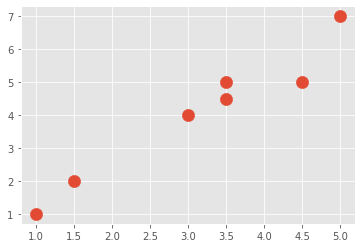

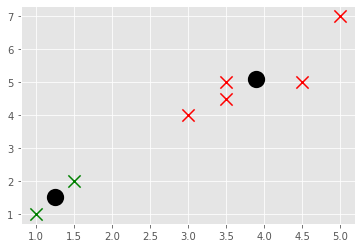

In [58]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1. , 1. ],
       [1.5, 2. ],
       [3. , 4. ],
       [5. , 7. ],
       [3.5, 5. ],
       [4.5, 5. ],
       [3.5, 4.5]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

colors = 10*["g","r","c","b","k"]


class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            

clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()           